# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# Load Dataset

In [3]:
df = pd.read_csv('malang.csv')
df.head()

,price,bedroom,hsize,lsize,location,facility
0,320000000.0,2,36.0,72,Kedungkandang,2.0
1,600000000.0,3,70.0,64,Dau,4.0
2,459000000.0,3,65.0,60,Pakis,6.0
3,227000000.0,2,62.0,43,Pakis,6.0
4,250000000.0,2,50.0,84,Singosari,NaN


In [4]:
df.shape

(3000, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     2991 non-null   float64
 1   bedroom   3000 non-null   int64  
 2   hsize     2997 non-null   float64
 3   lsize     3000 non-null   int64  
 4   location  3000 non-null   object 
 5   facility  987 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 140.8+ KB


<AxesSubplot:>

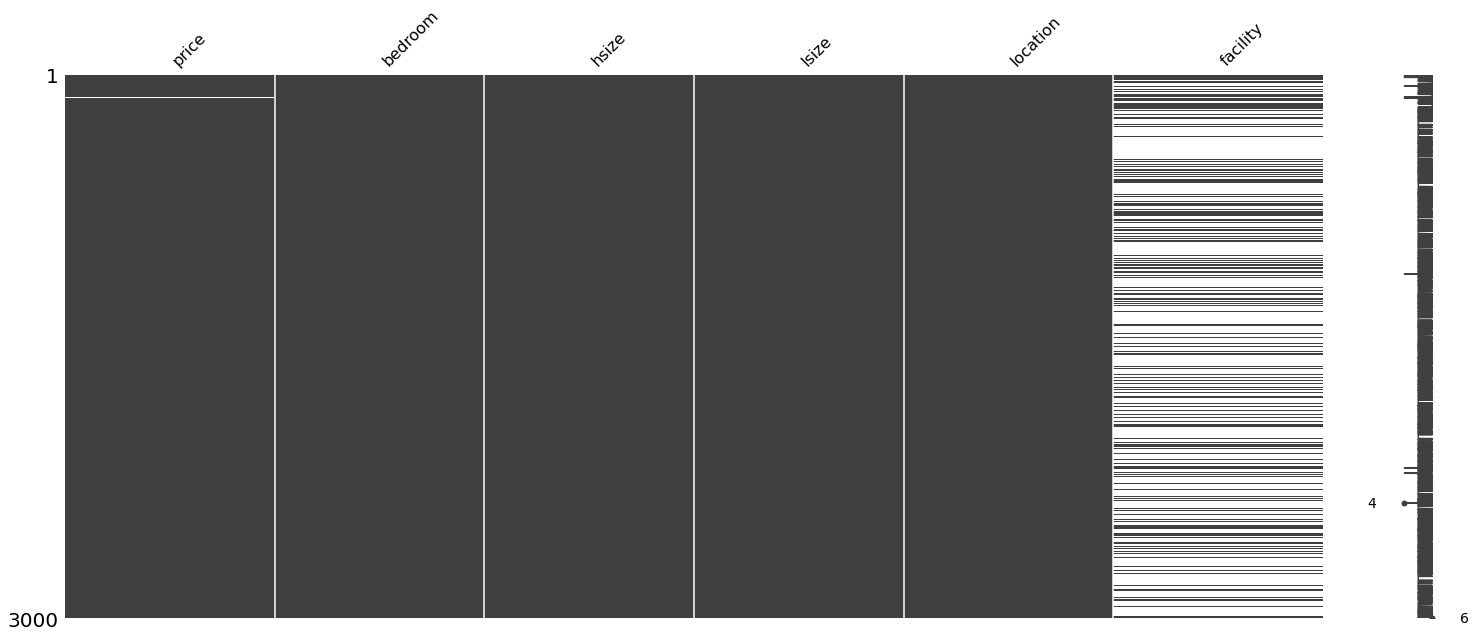

In [5]:
msno.matrix(df)

In [7]:
df.describe()

,price,bedroom,hsize,lsize,facility
count,2.991000e+03,3000.000000,2997.000000,3000.000000,987.000000
mean,1.956094e+09,4.246000,164.706373,179.025000,5.007092
std,2.619097e+09,8.886008,165.711102,204.545548,3.570636
min,9.900000e+07,1.000000,1.000000,1.000000,1.000000
25%,5.500000e+08,2.000000,58.000000,77.000000,2.000000
50%,1.030000e+09,3.000000,110.000000,116.000000,4.000000
75%,2.362500e+09,4.000000,200.000000,203.250000,7.000000
max,3.500000e+10,300.000000,2000.000000,4884.000000,22.000000


# EDA

## Target: price

In [8]:
df.price.head()

0    320000000.0
1    600000000.0
2    459000000.0
3    227000000.0
4    250000000.0
Name: price, dtype: float64

In [9]:
df['price'] = df.price / 1000000

C:\Users\ASUS\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

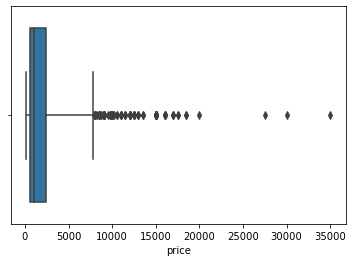

In [10]:
sns.boxplot(df.price, whis=3)

- Price distribution is skewed so hard, because of the outliers in the data let's remove it.
- House with a price above 8 Billion IDR is really really expensive and might screwed our model later.
- You gonna need an expert to inspect a house that price anyway.
- There are 9 missing values in our target variable let's remove it right now.

In [12]:
df.price.dropna(inplace=True)

In [25]:
price_outlier = df[df.price > 8000]
price_outlier.head()

,price,bedroom,hsize,lsize,location,facility
64,15000.0,26,1000.0,629,Ketawanggede,NaN
89,10000.0,6,528.0,528,Klojen,NaN
131,9000.0,6,730.0,450,Sukun,8.0
171,9000.0,6,400.0,561,Blimbing,6.0
183,10000.0,4,550.0,496,Dieng,NaN


In [26]:
df = df[~df.price.isin(price_outlier.price)]

<AxesSubplot:xlabel='price', ylabel='Count'>

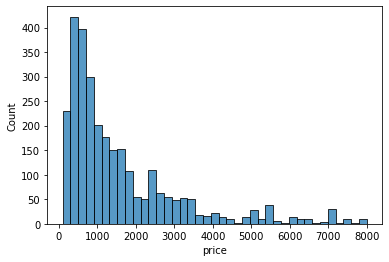

In [34]:
sns.histplot(df.price)

## Feature: bedroom

C:\Users\ASUS\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedroom', ylabel='count'>

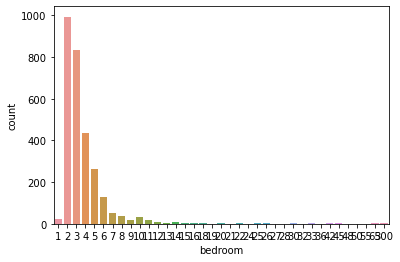

In [37]:
sns.countplot(df.bedroom)

In [38]:
df.bedroom.describe()

count    2897.000000
mean        4.101484
std         8.841924
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max       300.000000
Name: bedroom, dtype: float64

- Wow 300 bedrooms, I wonder what it is?

In [39]:
df[df.bedroom == 300]

,price,bedroom,hsize,lsize,location,facility
2168,1600.0,300,NaN,300,Blimbing,NaN
2198,1600.0,300,NaN,300,Blimbing,NaN


- looking at the price and the lot size, it's doesn't make any sense let's drop it
- also, a house with more than 6/7 bedrooms is maybe a 'kost' and we don't wanna predict a 'kost' price

In [43]:
bedroom_outlier = df[df.bedroom > 6]
bedroom_outlier.head()

,price,bedroom,hsize,lsize,location,facility
6,1350.0,13,280.0,84,Tlogomas,7.0
31,135.0,10,168.0,168,Merjosari,NaN
37,594.0,42,69.0,69,Lowokwaru,NaN
45,1500.0,11,198.0,115,Lowokwaru,4.0
47,890.0,8,140.0,72,Tunjungsekar,10.0


In [44]:
df = df[~df.bedroom.isin(bedroom_outlier.bedroom)]

C:\Users\ASUS\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedroom', ylabel='count'>

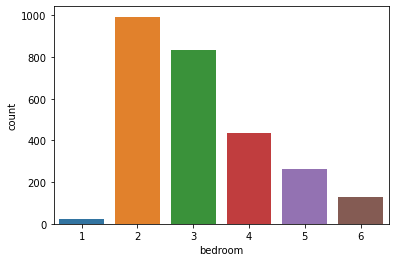

In [45]:
sns.countplot(df.bedroom)

## Feature: hsize

In [47]:
df.hsize.describe()

count    2674.000000
mean      134.863126
std       113.014554
min         1.000000
25%        54.000000
50%        97.000000
75%       180.000000
max      1000.000000
Name: hsize, dtype: float64

C:\Users\ASUS\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hsize'>

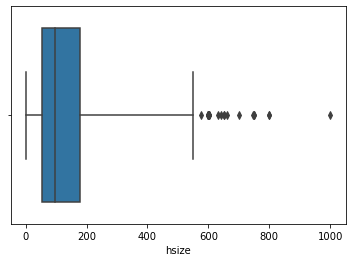

In [49]:
sns.boxplot(df.hsize,whis=3)

- I'm not sure right now let's later check it with our target variable

## Feature: lsize

In [53]:
df.lsize.describe()

count    2674.000000
mean      154.630890
std       172.136712
min         1.000000
25%        74.000000
50%       107.000000
75%       188.000000
max      4884.000000
Name: lsize, dtype: float64

C:\Users\ASUS\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='lsize'>

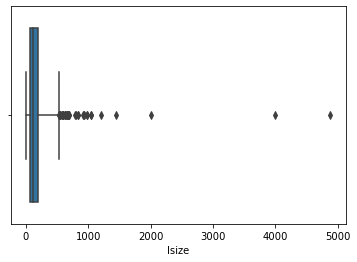

In [54]:
sns.boxplot(df.lsize,whis=3)

- A house with lot size higher than 700 is an outlier for sure
- But let's check it first

In [60]:
lsize_outlier = df[df.lsize > 700]
lsize_outlier

,price,bedroom,hsize,lsize,location,facility
849,7500.0,5,430.0,796,Hatta,NaN
1342,2800.0,3,300.0,910,Malang,NaN
1751,7000.0,5,462.0,831,Blimbing,NaN
2038,7100.0,6,600.0,800,Dieng,NaN
2383,1700.0,6,400.0,926,Lowokwaru,NaN
2431,1700.0,6,500.0,926,Lowokwaru,NaN
2439,1700.0,5,400.0,985,Blimbing,5.0
2466,1700.0,5,400.0,985,Blimbing,5.0
2579,7500.0,6,462.0,831,Blimbing,NaN


In [61]:
df = df[~df.lsize.isin(lsize_outlier.lsize)]

C:\Users\ASUS\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='lsize'>

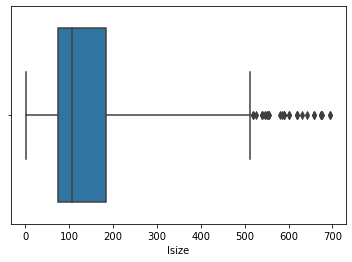

In [62]:
sns.boxplot(df.lsize,whis=3)

## Feature: location

In [65]:
df.location.value_counts()

Lowokwaru    532
Blimbing     462
Malang       335
Sukun        223
Dau          157
            ... 
BU             1
II             1
GOLF           1
Mas            1
langsep        1
Name: location, Length: 129, dtype: int64

- Since there are 129 unique location and there are only 5 district in Malang, let's bin them into 5 district and leave the others as 'other'

In [82]:
location = ['Lowokwaru', 'Blimbing', 'Sukun', 'Kedungkandang', 'Klojen']

In [83]:
df['location_bin'] = df.location.apply(lambda x: x if x in location else 'other')

In [84]:
df.location_bin.unique()

array(['Kedungkandang', 'other', 'Blimbing', 'Sukun', 'Lowokwaru',
       'Klojen'], dtype=object)

C:\Users\ASUS\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='location_bin', ylabel='count'>

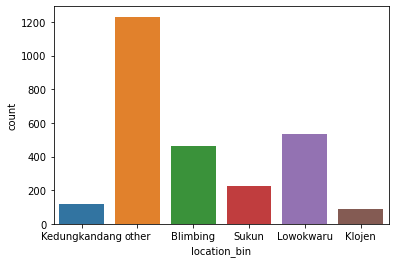

In [85]:
sns.countplot(df.location_bin)

In [86]:
df.drop('location', axis=1, inplace=True)

## Feature: facility

In [92]:
df.facility.describe()

count    879.000000
mean       4.918089
std        3.531844
min        1.000000
25%        2.000000
50%        4.000000
75%        7.000000
max       22.000000
Name: facility, dtype: float64

In [93]:
df.shape

(2658, 6)

- There are so many missing values in here, we might consider drop it
- And after investigating some samples, facility is subjective it have high chance of people over estimate their house facilities

In [94]:
df.drop('facility', axis=1, inplace=True)

In [95]:
df.head()

,price,bedroom,hsize,lsize,location_bin
0,320.0,2,36.0,72,Kedungkandang
1,600.0,3,70.0,64,other
2,459.0,3,65.0,60,other
3,227.0,2,62.0,43,other
4,250.0,2,50.0,84,other


## Feature: price per m2

Let's create a feature for price per m2 to see wheter there are some nonsense in our data.

In [96]:
df['price_perm2'] = df.price / df.lsize

In [98]:
df.price_perm2.describe()

count    2650.000000
mean        9.392953
std        12.389660
min         0.611111
25%         6.111111
50%         8.333333
75%        11.250000
max       550.000000
Name: price_perm2, dtype: float64

C:\Users\ASUS\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_perm2'>

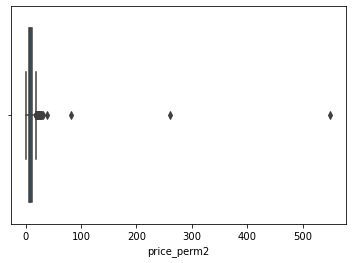

In [104]:
sns.boxplot(df.price_perm2)

- there are still some outlier in our data

In [122]:
outlier_perm2 = df[df.price_perm2 > 20]
outlier_perm2.head()

,price,bedroom,hsize,lsize,location_bin,price_perm2
98,260.0,2,30.0,1,other,260.000000
141,5415.0,5,274.0,264,Sukun,20.511364
180,2650.0,2,189.0,126,other,21.031746
227,7500.0,5,450.0,305,other,24.590164
243,2400.0,4,236.0,118,other,20.338983


- The mean of price per m2 in Malang normally is about 8-9 Million IDR

In [123]:
df = df[~df.price_perm2.isin(outlier_perm2.price_perm2)]

C:\Users\ASUS\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_perm2'>

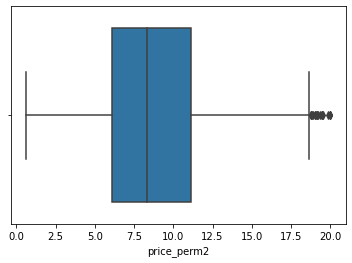

In [125]:
sns.boxplot(df.price_perm2)

- Let's drop this feature since we don't need it anymore

In [126]:
df.drop('price_perm2', axis=1, inplace=True)

C:\Users\ASUS\AppData\Local\Temp/ipykernel_1860/3490082335.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('price_perm2', axis=1, inplace=True)


## Target vs Feature

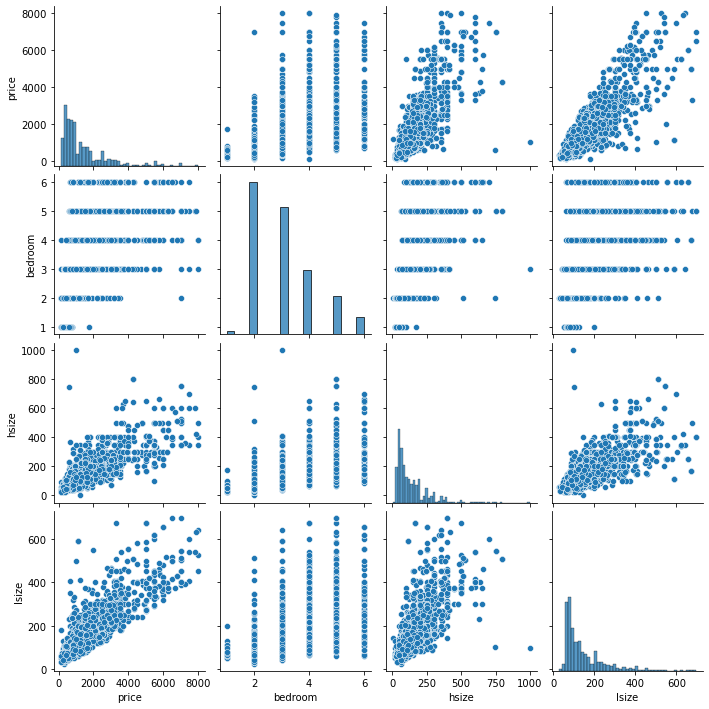

In [130]:
sns.pairplot(df)

- There are some outlier where the the price is low but have huge house size

In [134]:
hsize_outlier = df[(df.price < 1000) & (df.hsize > 500)]
hsize_outlier

,price,bedroom,hsize,lsize,location_bin
290,995.0,3,1000.0,98,other
2365,594.0,2,745.0,100,Blimbing


In [135]:
df = df[~df.isin(hsize_outlier)]

<AxesSubplot:xlabel='location_bin', ylabel='price'>

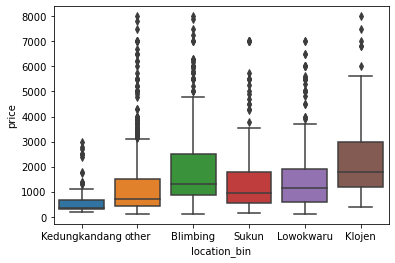

In [140]:
sns.boxplot(y='price', x='location_bin', data=df)

- The lowest median of house price in Malang is in Kedungkandang
- The highest is Klojen